In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_img(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img.shape[-1] == 4:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA))
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return img

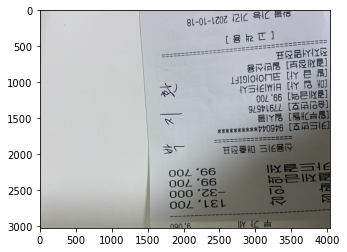

In [3]:
sign = read_img('image/sign.jpg')

In [4]:
sign = cv2.rotate(sign, cv2.ROTATE_90_CLOCKWISE)

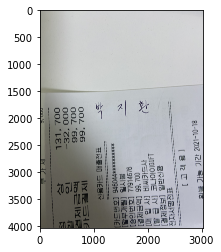

In [5]:
plt.imshow(cv2.cvtColor(sign, cv2.COLOR_RGB2BGR))

In [8]:
def select_roi(img, save_path):
    x, y, w, h = cv2.selectROI('img', img, False)
    if w and h:
        print(f'x:{x: 3d}, y:{y: 3d}, w:{w: 3d}, h:{h: 3d}')
        roi = img[y:y+h, x:x+w]
        cv2.imshow('roi', roi)
        cv2.moveWindow('roi', 0,0)
        cv2.imwrite(save_path,roi)

    cv2.imshow('img',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
select_roi(sign, 'image/roi.jpg')

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
x: 1004, y: 1651, w: 1035, h: 366


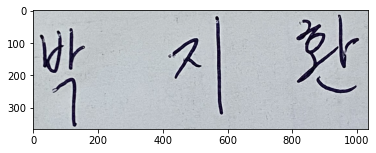

In [11]:
roi_sign = read_img('image/roi.jpg')

In [12]:
gray_sign = cv2.cvtColor(roi_sign, cv2.COLOR_BGR2GRAY)

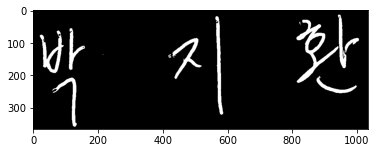

In [14]:
_, ret = cv2.threshold(gray_sign, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(ret, cmap='gray')

In [15]:
ret.shape

(366, 1035)

In [16]:
png = ret.reshape((ret.shape[0], ret.shape[1], 1))
png_sign = np.concatenate((roi_sign, png), axis=-1)
png_sign.shape

(366, 1035, 4)

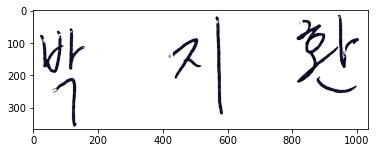

In [18]:
plt.imshow(cv2.cvtColor(png_sign, cv2.COLOR_BGRA2RGBA))

In [20]:
cv2.imwrite('image/sign.png', png_sign)

True

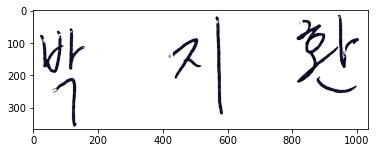

In [21]:
png_sign = read_img('image/sign.png')

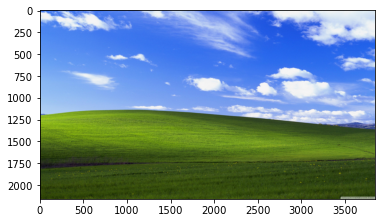

In [22]:
background = read_img('image/background.jpg')

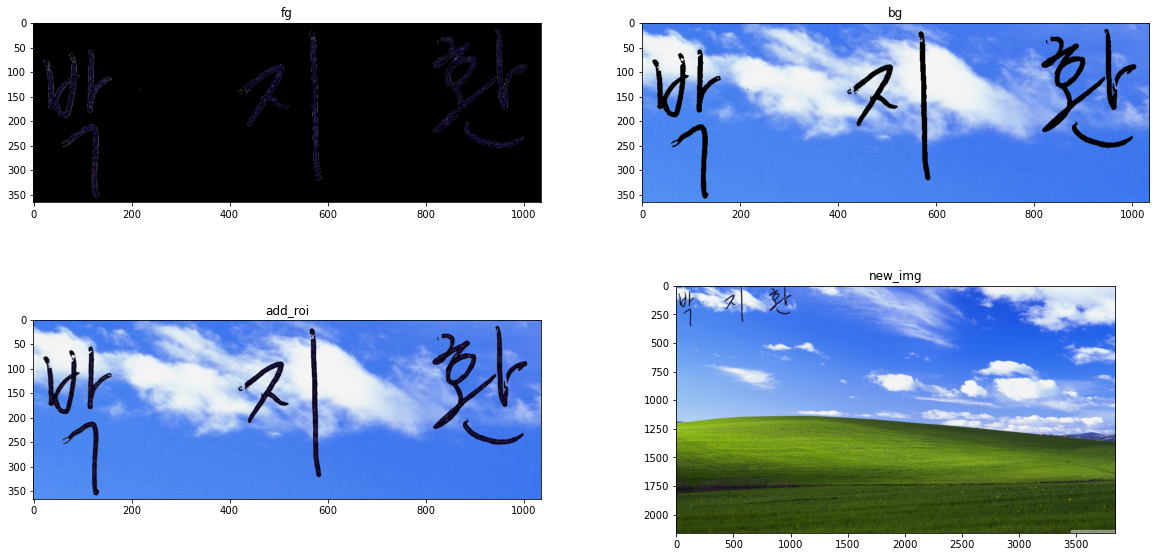

In [27]:
h, w, c = png_sign.shape
mask = png_sign[:,:,3]
mask_inv = cv2.bitwise_not(mask)

bgr_sign = png_sign[:,:,:3]
back_roi = background[:h, :w, :]

fg = cv2.bitwise_and(bgr_sign, bgr_sign, mask=mask)
bg = cv2.bitwise_and(back_roi, back_roi, mask=mask_inv)
add_roi = fg+bg

new_img = background.copy()
new_img[:h, :w, :] = add_roi

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(fg, cv2.COLOR_BGR2RGB))
plt.title('fg')
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))
plt.title('bg')
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(add_roi, cv2.COLOR_BGR2RGB))
plt.title('add_roi')
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.title('new_img')
plt.show()
